# New section

First 5 rows of dataset:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

      

/tmp/ipython-input-3817826229.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


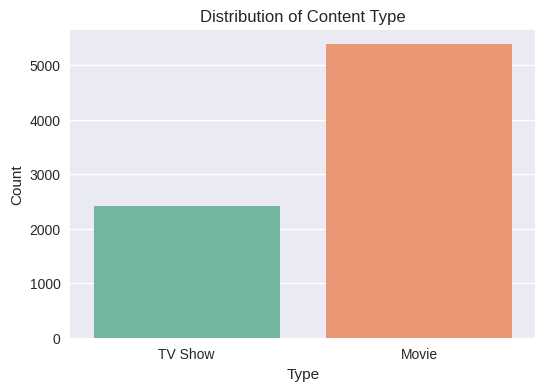

Total entries: 7787


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Netflix Dataset.csv")
print("First 5 rows of dataset:")
print(df.head(), "\n")
print("Dataset Information:\n")
print(df.info(), "\n")
print("Summary Statistics:\n")
print(df.describe(include='all'), "\n")
print("Missing values per column:\n", df.isnull().sum(), "\n")
df.drop_duplicates(inplace=True)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
if 'release_year' in df.columns:
    plt.figure(figsize=(10,5))
    df['release_year'].value_counts().sort_index().plot(kind='bar')
    plt.title("Number of Titles Released per Year")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.show()
if 'country' in df.columns:
    plt.figure(figsize=(10,5))
    df['country'].dropna().value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Countries by Content Count")
    plt.xlabel("Country")
    plt.ylabel("Number of Titles")
    plt.show()
if 'listed_in' in df.columns:
    plt.figure(figsize=(10,5))
    all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
    all_genres.value_counts().head(10).plot(kind='bar', color='salmon')
    plt.title("Top 10 Genres on Netflix")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.show()
if 'director' in df.columns:
    plt.figure(figsize=(10,5))
    df['director'].dropna().value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title("Top 10 Directors by Number of Titles")
    plt.xlabel("Director")
    plt.ylabel("Count")
    plt.show()
print("Total entries:", len(df))
if 'type' in df.columns:
    print("Content type distribution:\n", df['type'].value_counts(), "\n")
if 'release_year' in df.columns:
    print("Earliest release year:", df['release_year'].min())
    print("Latest release year:", df['release_year'].max())

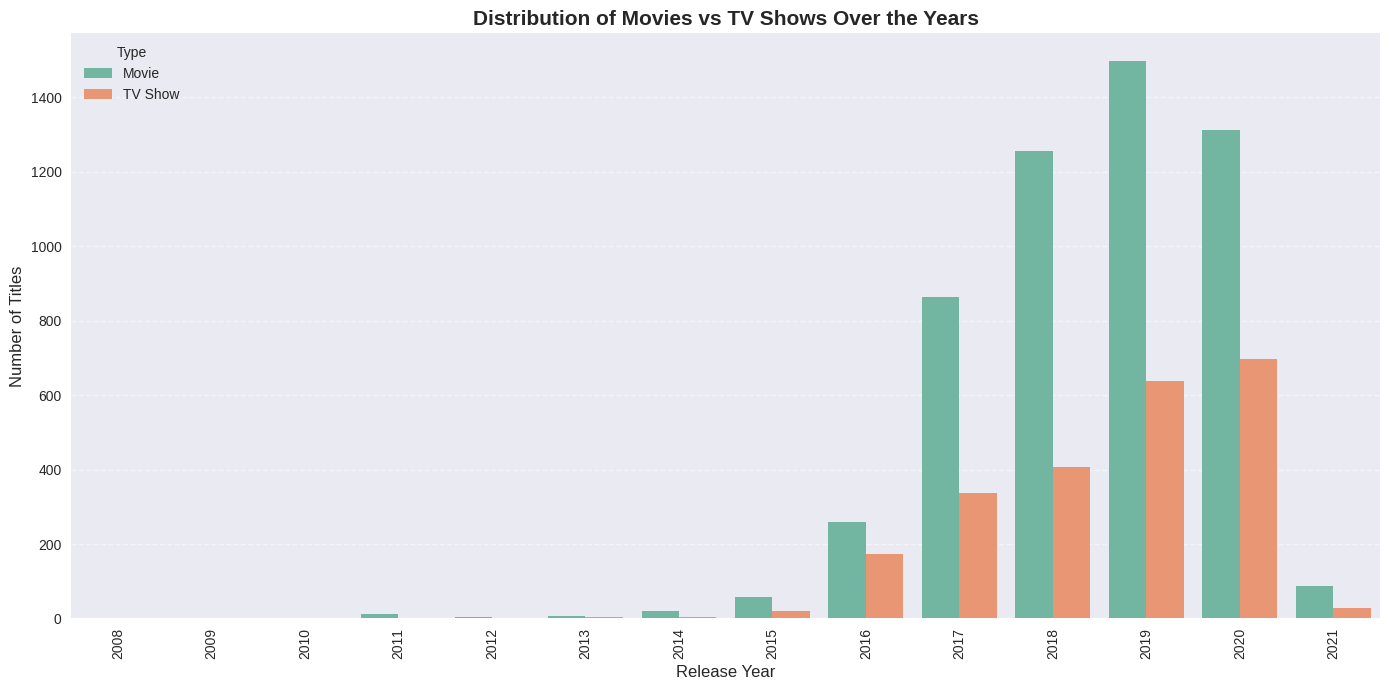


Year-wise distribution of Movies and TV Shows:

Category      Movie  TV Show
release_year                
2008              1        1
2009              2        0
2010              1        0
2011             13        0
2012              3        0
2013              6        4
2014             19        5
2015             58       21
2016            258      174
2017            864      337
2018           1255      406
2019           1497      639
2020           1312      696
2021             88       29


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Netflix Dataset.csv")
df.drop_duplicates(inplace=True)
df.dropna(subset=['Release_Date', 'Category'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['release_year'] = df['Release_Date'].dt.year
year_type_counts = df.groupby(['release_year', 'Category']).size().reset_index(name='count')
year_type_counts = year_type_counts.sort_values('release_year')
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
plt.figure(figsize=(14,7))
sns.barplot(
    data=year_type_counts,
    x='release_year',
    y='count',
    # Corrected column name: 'Category'
    hue='Category'
)
plt.title("Distribution of Movies vs TV Shows Over the Years", fontsize=15, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title='Type', loc='upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
summary = year_type_counts.pivot(index='release_year', columns='Category', values='count').fillna(0).astype(int)
print("\nYear-wise distribution of Movies and TV Shows:\n")
print(summary.tail(15))  # show last 15 years

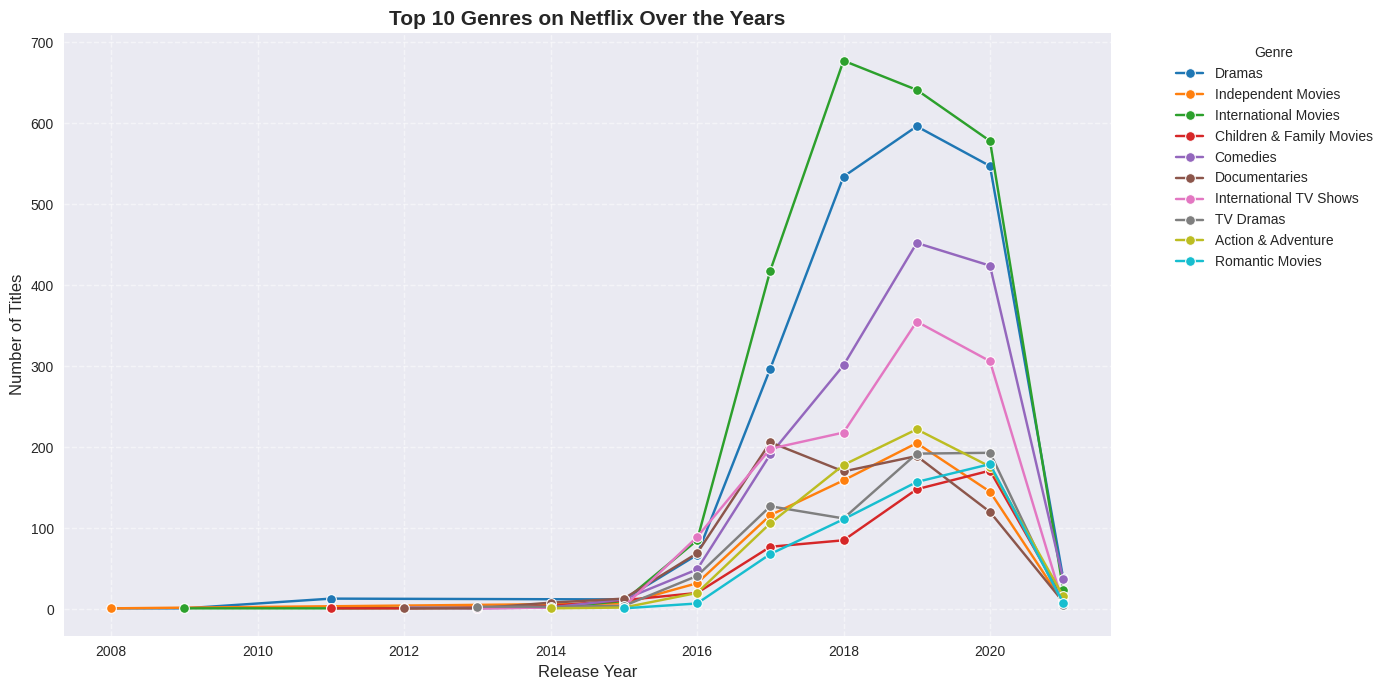

/tmp/ipython-input-1664096537.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


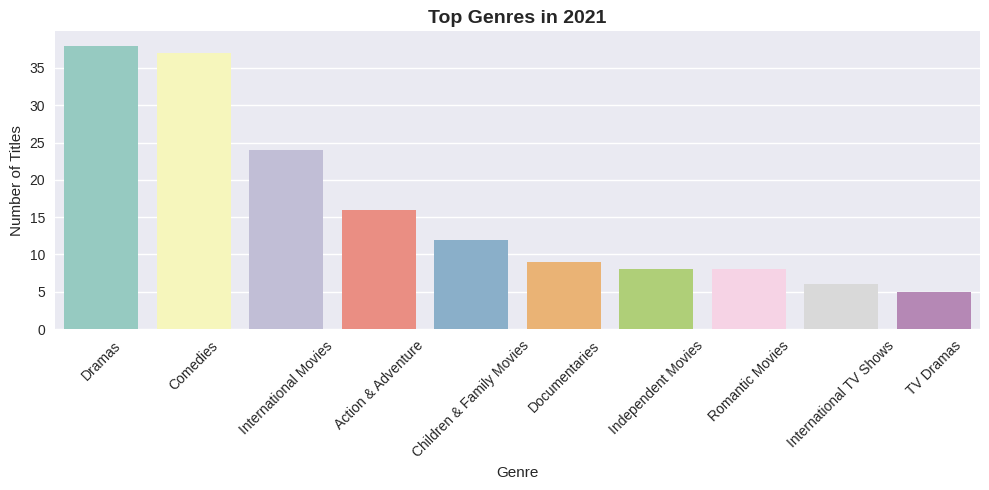


Top 10 Genres Overall:

genre
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1176
Documentaries                786
Action & Adventure           721
TV Dramas                    680
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64

Genre distribution in the latest year (2021):

                       genre  count
85                    Dramas     38
83                  Comedies     37
87      International Movies     24
81        Action & Adventure     16
82  Children & Family Movies     12
84             Documentaries      9
86        Independent Movies      8
89           Romantic Movies      8
88    International TV Shows      6
90                 TV Dramas      5


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Netflix Dataset.csv"
df.drop_duplicates(inplace=True)
df.dropna(subset=['Type', 'Release_Date'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['release_year'] = df['Release_Date'].dt.year
df_genres = df.assign(genre=df['Type'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()
top_genres = df_genres['genre'].value_counts().head(10).index
df_top_genres = df_genres[df_genres['genre'].isin(top_genres)]
genre_trends = (
    df_top_genres.groupby(['release_year', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values('release_year')
)
plt.style.use('seaborn-v0_8')
sns.set_palette('tab10')
plt.figure(figsize=(14,7))
sns.lineplot(
    data=genre_trends,
    x='release_year',
    y='count',
    hue='genre',
    marker='o'
)
plt.title("Top 10 Genres on Netflix Over the Years", fontsize=15, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
latest_year = df['release_year'].max()
recent_data = genre_trends[genre_trends['release_year'] == latest_year]
plt.figure(figsize=(10,5))
sns.barplot(
    data=recent_data.sort_values('count', ascending=False),
    x='genre',
    y='count',
    palette='Set3'
)
plt.title(f"Top Genres in {latest_year}", fontsize=14, weight='bold')
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nTop 10 Genres Overall:\n")
# Corrected column name: 'Type'
print(df_genres['genre'].value_counts().head(10))

print(f"\nGenre distribution in the latest year ({latest_year}):\n")
print(recent_data[['genre', 'count']].sort_values('count', ascending=False))

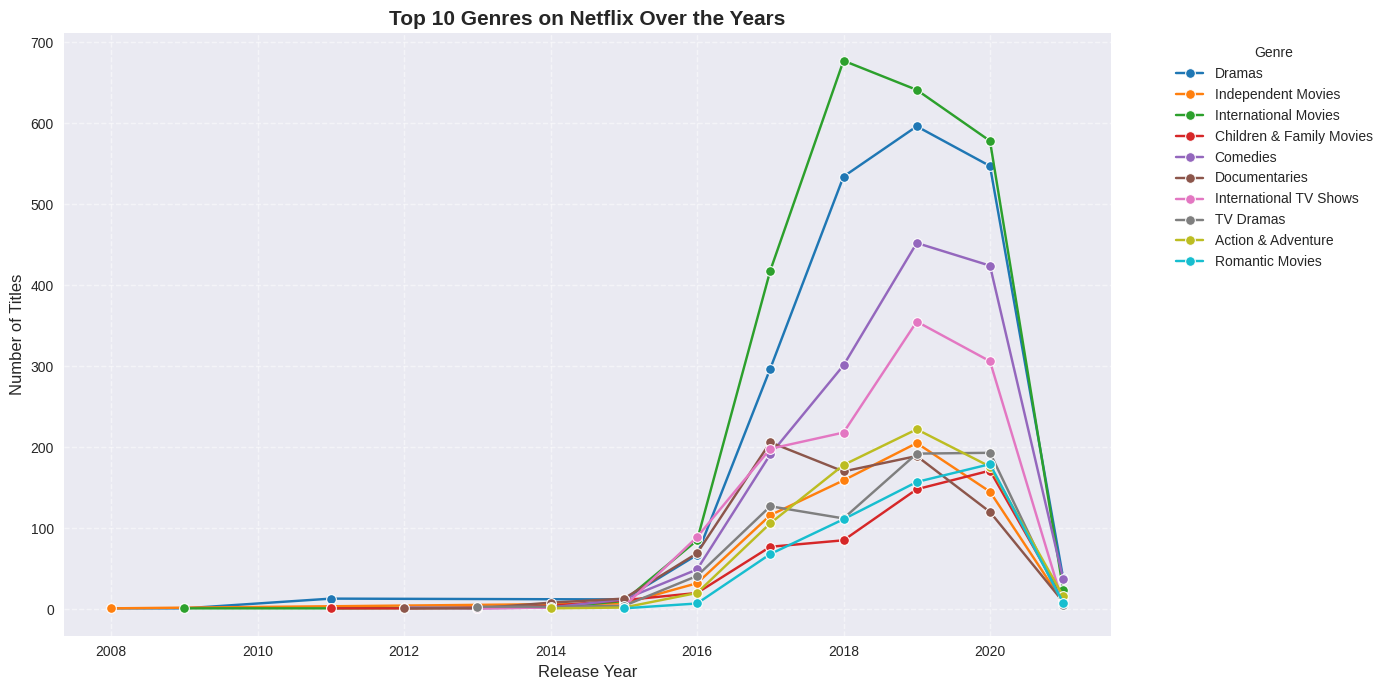

/tmp/ipython-input-1259105028.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


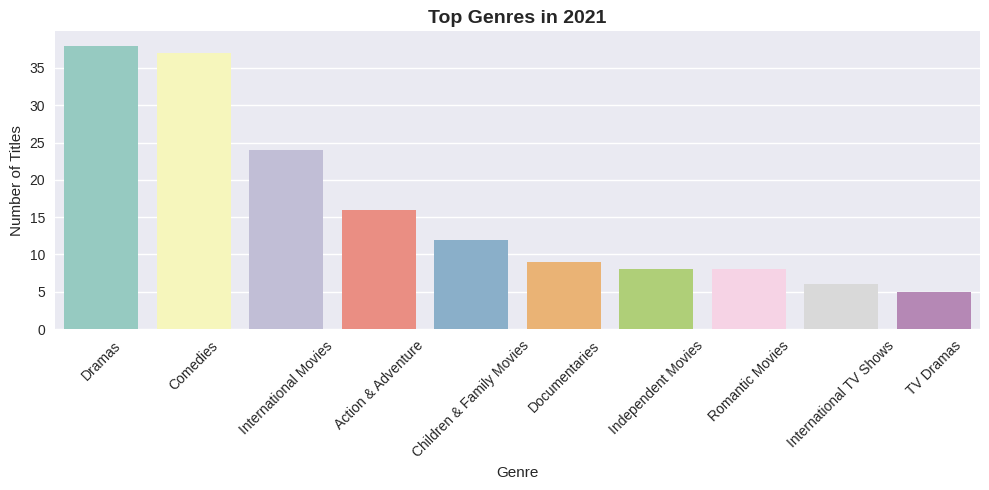


Top 10 Genres Overall:

genre
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1176
Documentaries                786
Action & Adventure           721
TV Dramas                    680
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64

Genre distribution in the most recent year (2021):

                       genre  count
85                    Dramas     38
83                  Comedies     37
87      International Movies     24
81        Action & Adventure     16
82  Children & Family Movies     12
84             Documentaries      9
86        Independent Movies      8
89           Romantic Movies      8
88    International TV Shows      6
90                 TV Dramas      5


In [10]:
# -------------------------------------------------
# Netflix Dataset: Most Common Genres & Popularity Trends
# -------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Netflix Dataset.csv")

# -------------------------------
# 1. Data Cleaning
# -------------------------------
df.drop_duplicates(inplace=True)
# Corrected column names: 'Type' and 'Release_Date'
df.dropna(subset=['Type', 'Release_Date'], inplace=True)
# Convert 'Release_Date' to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True) # Drop rows where conversion failed
df['release_year'] = df['Release_Date'].dt.year
df['release_year'] = df['release_year'].astype(int)


# -------------------------------
# 2. Split Multiple Genres
# -------------------------------
# "Type" column contains multiple genres separated by commas
df_genres = df.assign(genre=df['Type'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()

# -------------------------------
# 3. Find Top 10 Genres Overall
# -------------------------------
top_genres = df_genres['genre'].value_counts().head(10).index
df_top_genres = df_genres[df_genres['genre'].isin(top_genres)]

# -------------------------------
# 4. Group by Year and Genre
# -------------------------------
genre_trends = (
    df_top_genres.groupby(['release_year', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values('release_year')
)

# -------------------------------
# 5. Line Chart — Popularity Over Time
# -------------------------------
plt.style.use('seaborn-v0_8')
sns.set_palette('tab10')

plt.figure(figsize=(14,7))
sns.lineplot(
    data=genre_trends,
    x='release_year',
    y='count',
    hue='genre',
    marker='o'
)
plt.title("Top 10 Genres on Netflix Over the Years", fontsize=15, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Bar Chart — Most Popular Genres in Latest Year
# -------------------------------
latest_year = df['release_year'].max()
recent_data = genre_trends[genre_trends['release_year'] == latest_year]

plt.figure(figsize=(10,5))
sns.barplot(
    data=recent_data.sort_values('count', ascending=False),
    x='genre',
    y='count',
    palette='Set3'
)
plt.title(f"Top Genres in {latest_year}", fontsize=14, weight='bold')
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 7. Text Summary
# -------------------------------
print("\nTop 10 Genres Overall:\n")
print(df_genres['genre'].value_counts().head(10))

print(f"\nGenre distribution in the most recent year ({latest_year}):\n")
print(recent_data[['genre', 'count']].sort_values('count', ascending=False))

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code and audio.

**How to get started**
*  Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google Account.
*  <a href="https://aistudio.google.com/app/apikey">Create an API key</a>.
* Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Discover Gemini's advanced capabilities**
*  Play with Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">multimodal outputs</a>, mixing text and images in an iterative way.
*  Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> &#40;demo <a href="https://aistudio.google.com/live">here</a>&#41;.
*  Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analyse images and detect items in your pictures</a> using Gemini &#40;bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!&#41;.
*  Unlock the power of the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex tasks with its inner thoughts.
      
**Explore complex use cases**
*  Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on the Internet.
*  Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDFs</a> in a structured way.
*  Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustrations based on a whole book</a> using Gemini large context window and Imagen.

To learn more, take a look at the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.


Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  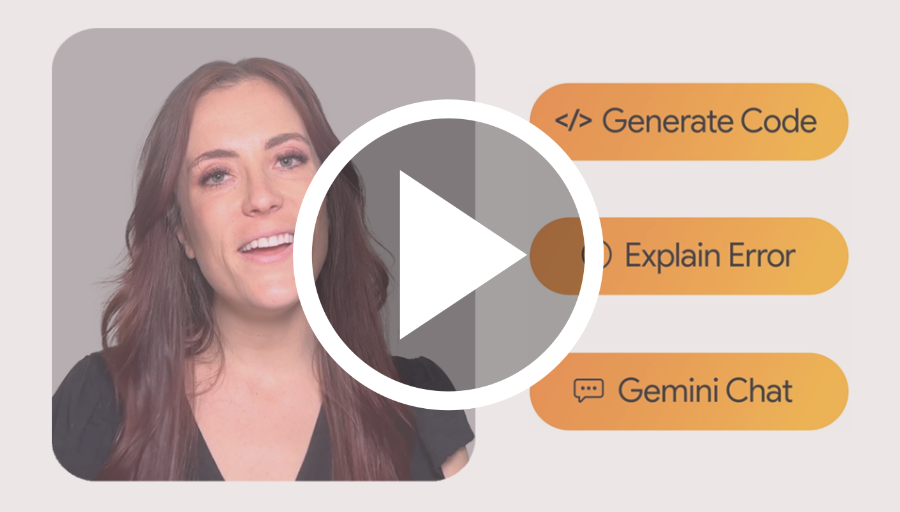
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> or <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab features you may have missed</a> to learn more or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

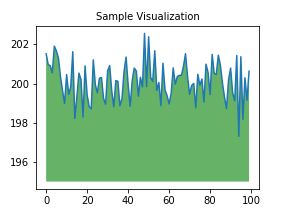

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
